<img src="https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc.com%2Fimages%2F35801123%2F133383632059%2F1%2Foriginal.jpg?w=800&rect=0%2C0%2C2160%2C1080&s=6e2b5901c09d9a6e687ed09a66372984" alt="DC Logo" style="width: 900px;float:left;"/>

# WORKSHOP 3
## <span style="color:green">Regression</span>

**Background:** This workshop will focus on 3 types of regression techniques - Linear, Logistic, and Polynomial.

## Let's get started!

- <span style="color: blue">**Answer any questions in bold and blue in the code block(cell) below each section.** </span>
  
- <span style="color: green">*Any statements in italic and green are for consideration and should help guide you to understand the code involved.* </span>

# <span style="color:green">SECTION 1</span>
## Linear Regression

In [83]:
# imports
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

# this allows plots to appear directly in the notebook
%matplotlib inline

## Data
**Lets take a look at some data, ask some questions and use linear regression to solve said questions**

In [84]:
# read data into a DataFrame
data = pd.read_csv('./goog.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,26-Feb-16,708.58,713.43,700.86,705.07,2239978
1,25-Feb-16,700.01,705.98,690.58,705.75,1631855
2,24-Feb-16,688.92,700.00,680.78,699.56,1958611
3,23-Feb-16,701.45,708.40,693.58,695.85,1999699
4,22-Feb-16,707.45,713.24,702.51,706.46,1946067


In [85]:
dates = [int(i.split('-')[0]) for i in np.array(data)[:,0]]
prices = np.array(data)[:,1]
# high = np.array(data)[:,2]

prices = np.array([prices]).T
dates = np.array([dates]).T
# high = np.array([high]).T
# prices = np.hstack((prices, high))

# print(dates)
# print(prices)

In [86]:
def predict_price(dates, prices, x):
    linear_mod = linear_model.LinearRegression()
    linear_mod.fit(dates, prices)
    predicted_price = linear_mod.predict(x)
    return predicted_price, linear_mod.coef_, linear_mod.intercept_
#     return predicted_price, linear_mod

In [87]:
def show_plot(dates, prices):
    linear_mod = linear_model.LinearRegression()
    linear_mod.fit(dates, prices)
    plt.scatter(dates, prices, color='lime')
    plt.plot(dates, linear_mod.predict(dates), color='blue', linewidth=3)
    plt.show()
    return

In [88]:
print(predict_price(dates, prices, 29))

(array([[ 680.9255198]]), array([[-1.65535515]]), array([ 728.93081909]))


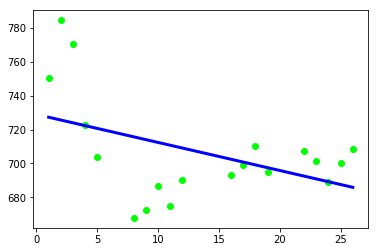

In [89]:
show_plot(dates, prices)

# <span style="color:green">SECTION 2</span>
### Logistic Regression

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets

In [91]:
# import some data to play with
iris = datasets.load_iris()
df = pd.DataFrame(np.c_[iris.data, iris.target], columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])


data = np.c_[iris.data[:, :2], iris.target] # we only take the first two features.
np.random.shuffle(data)

test_training_split = 0.7

X = data[:, :2]  # we only take the first two features.
y = data[:, 2:]

X_training = X[:int(X.shape[0]*test_training_split),:]
y_training = y[:int(y.shape[0]*test_training_split)]

X_testing = X[int(X.shape[0]*test_training_split):,:]
y_testing = y[int(y.shape[0]*test_training_split):]

**Classes:**
- Iris Setosa 
- Iris Versicolour 
- Iris Virginica

### Now it's time to take a look at our data to make sure everything looks okay

In [114]:
print(y_testing)
print(y_testing.ravel())
print(y_testing.shape)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]
[ 0.  0.  0.  2.  2.  1.  2.  0.  2.  1.  1.  0.  2.  1.  1.  0.  2.  2.
  2.  1.  0.  2.  0.  2.  1.  0.  0.  1.  1.  1.  2.  1.  2.  1.  2.  1.
  1.  1.  0.  0.  1.  0.  0.  1.  1.]
(45, 1)


### Looks good, let's initialize our logistic regression function imported from sklearn

In [93]:
logreg = linear_model.LogisticRegression()

In [94]:
# We use the initialized function and fit the data.
logreg.fit(X_training, y_training.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
Z = logreg.predict(X_testing)

In [96]:
def classification_rate(y, Z):
    num_right = 0
    for i in range(len(Z)):
        if y[i] == Z[i]:
            num_right = num_right + 1
    return num_right/Z.shape[0]

In [97]:
classification_rate(y_testing.ravel(), Z)

0.6222222222222222

## Well this isn't that great now is it?
### What comes next?

Let's begin implementing k-fold cross validation training and see what our output is

In [98]:
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression

In [99]:
Z_cross_validation = cross_validation.cross_val_predict(LogisticRegression(), X, y.ravel(), cv=10)

In [100]:
classification_rate(y.ravel(), Z_cross_validation)

0.7733333333333333

## Not much better...
#### There are many different classification algorithms sklearn has available to utilize in a much similar way to what was shown above. If you're interested, try playing around with the following:
1. SVM
2. Naive Bayes
3. Decision Trees
4. Random Forests
5. Neural Networks

# <span style="color:green">SECTION 3</span>
### Polynomial Regression

In [101]:
import numpy as np
# from scipy.interpolate import *
import matplotlib.pyplot as plt

%matplotlib inline

### We're going to take a look at some synthetic data for this one
Hopefully this will help visualize what's going on a bit better

In [102]:
# Create a couple arrays with 
X = np.array([0,1,2,3,4,5])
y = np.array([0,0.8,0.9,0.1,-0.8,-1])

In [103]:
print(X)

[0 1 2 3 4 5]


In [104]:
print(y)

[ 0.   0.8  0.9  0.1 -0.8 -1. ]


**Let's begin fitting our data. The polyfit method uses the sum of square errors to. compute the line of best fit. In this first piece of code, we're going to stick with a straight line**

In [105]:
# The last parameters is a 1 for now as we'll do linear to begin with
p1 = np.polyfit(X, y, 1)

In [106]:
# This just prints the slope and intercept
print(p1)

[-0.30285714  0.75714286]


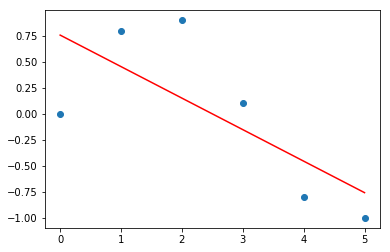

In [107]:
# polyval just helps plot the data with respect to the slope, intercept, and data. 
# r- is just for red line
plt.plot(X,y,'o')
plt.plot(X, np.polyval(p1, X), 'r-')
# np.polyval(p1, X)

In [108]:
p2 = np.polyfit(X, y, 2)
p3 = np.polyfit(X, y, 3)

In [109]:
p1 # y = Ax + b

array([-0.30285714,  0.75714286])

In [110]:
p2 # y = Ax^2 + Bx + C

array([-0.16071429,  0.50071429,  0.22142857])

In [111]:
p3 # y = Ax^3 + Bx^2 + Cx + D

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

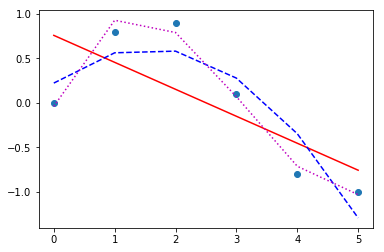

In [112]:
plt.plot(X,y,'o')

xp = X
# xp = np.linspace(-2,6,100)

plt.plot(xp, np.polyval(p1,xp), 'r-')
plt.plot(xp, np.polyval(p2,xp), 'b--')
plt.plot(xp, np.polyval(p3,xp), 'm:')

In [113]:
np.polyval(p1,xp)

array([ 0.75714286,  0.45428571,  0.15142857, -0.15142857, -0.45428571,
       -0.75714286])